In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.array([6.3,13.81,11.75,8.82,20.58,12.37,
   7.22,14.6,5.62,20.51,9.55,
   16.79,6.98,5.44,14.1,8.96,
   6.39,20.37,15.12,7.97,15.47,16.86,10.2,
   4.85,7.42,1.86,10.86,4.04,10.19,12.34,4.16,9.17
   ,13.49,22.21,5.99,11.94,17.28,5.18,5.4]).T

Y = np.array([19.25,28.36,32.01,22.0,31.5,29.89,19.02,
   26.09,16.37,33.34,25.6,33.56,25.33,21.17,
   28.38,20.72,25.3,29.99,32.24,21.26,27.28,
   29.52,28.01,23.52,21.34,9.48,21.77,12.52,
   29.8,27.95,12.7,17.06,28.77,39.16,15.14,
   28.04,29.65,23.31,18.32])

df = pd.DataFrame(np.column_stack([X,Y]), columns = ('X', 'Y'))
df.head()

,X,Y
0,6.30,19.25
1,13.81,28.36
2,11.75,32.01
3,8.82,22.00
4,20.58,31.50


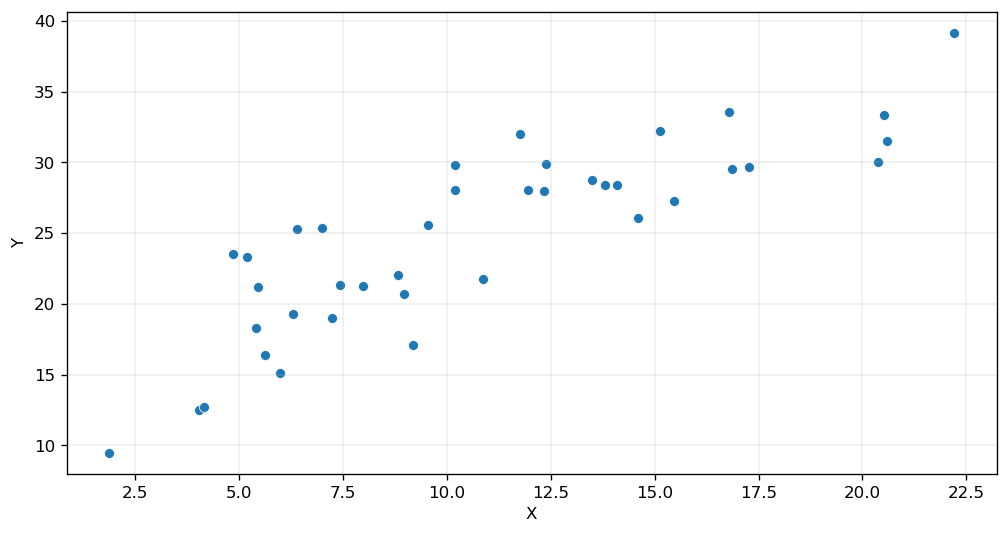

In [126]:
plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data = df, x = 'X', y = 'Y');
plt.grid(linewidth=0.2)

Рассматриваем задачу минимизации:
$$
f(a, b) = \sum_{i=1}^n (a x_i + b - y_i)^2.
$$

Возьмем частные производные:

\$$
\frac{\partial}{\partial a} f(a, b) = -2 \sum_{i=1}^N \left( y_i - a - b x_i \right),
$$
\
$$\frac{\partial}{\partial b} f(a, b) = -2 \sum_{i=1}^N \left( y_i - a - b x_i \right)x_i.$$

Значения параметров, минимизирующие функцию потерь, удовлетворяют уравнениям:

$$
0 = -2 \sum_{i=1}^N \left( y_i - \hat{a} - \hat{b} x_i \right),
$$
$$0 = -2 \sum_{i=1}^N \left( y_i - \hat{a} - \hat{b} x_i \right)x_i.
$$

Решая уравнение, получаем:

$$
\hat{a} = \frac{\sum_i y_i}{N} - \hat{b} \frac{\sum_i x_i}{N},
$$
$$\hat{b} = \frac{\frac{\sum_i x_i y_i}{N} - \frac{\sum_i x_i}{N} \frac{\sum_i y_i}{N}}{\frac{\sum_i x_i^2}{N} - \left( \frac{\sum_i x_i}{N} \right)^2}.$$

Преобразовывая выражение, получаем:

$$y - \langle y \rangle = \rho(x, y) \frac{\sigma_y}{\sigma_x} (x - \langle x \rangle).$$

Где:\
$\langle y \rangle$ - среднее значение y \
$\langle x \rangle$ - среднее значение x \
$\rho(x, y)$ - корреляция х и у \
$\sigma_x$ - Стандартное отклонение по х\
$\sigma_y$ - Стандартное отклонение по y


In [122]:
x_mean = X.mean()
y_mean = Y.mean()

correlation_coef = np.corrcoef(X, Y)[0,1]

y_var = Y.std()
x_var = X.std()

a = correlation_coef * y_var / x_var
b = y_mean - x_mean*a
print(f"Коэффициенты: a = {round(a,2)}, b = {round(b,2)}")

Коэффициенты: a = 1.06, b = 13.25


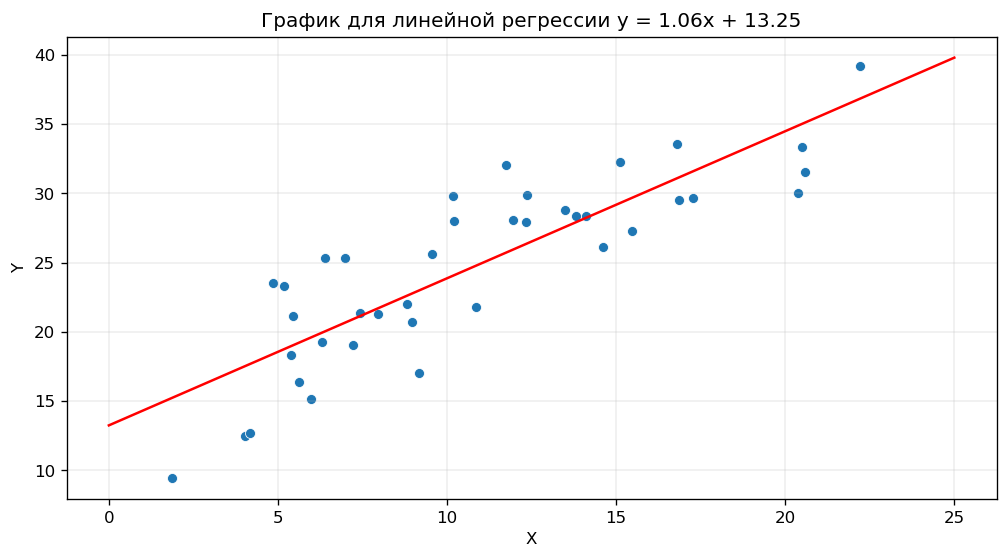

In [124]:
x = np.linspace(0, 25, 100)
y = a*x + b

plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data = df, x = 'X', y = 'Y')
sns.lineplot(x = x, y = y, color='red')
plt.title(f'График для линейной регрессии y = {round(a,2)}x + {round(b,2)}');
plt.grid(linewidth=0.2)


Рассматриваем задачу минимизации:
$$
f(b_1, b_2, b_3) = \sum_{i=1}^n (b_1 x_i^2 + b_2 x_i + b_3 - y_i)^2.
$$

Найдем частные производные: 
1. Производная по b1\:
$$
\frac{\partial f}{\partial b_1} = 2 \sum_{i=1}^n (b_1 x_i^2 + b_2 x_i + b_3 - y_i) x_i^2.
$$

2. Производная по b2\:
$$
\frac{\partial f}{\partial b_2} = 2 \sum_{i=1}^n (b_1 x_i^2 + b_2 x_i + b_3 - y_i) x_i.
$$

3. Производная по b3\:
$$
\frac{\partial f}{\partial b_3} = 2 \sum_{i=1}^n (b_1 x_i^2 + b_2 x_i + b_3 - y_i).
$$

Составим и решим систему уравнений, приравниваем каждую из производных к нулю:
1. Уравнение для b1\:
$$
\sum x_i^4 b_1 + \sum x_i^3 b_2 + \sum x_i^2 b_3 = \sum x_i^2 y_i.
$$

2. Уравнение для b2\:
$$
\sum x_i^3 b_1 + \sum x_i^2 b_2 + \sum x_i b_3 = \sum x_i y_i.
$$

3. Уравнение для b3\:
$$
\sum x_i^2 b_1 + \sum x_i b_2 + n b_3 = \sum y_i.
$$



In [118]:
S_x4 = np.sum(X**4)
S_x3 = np.sum(X**3)
S_x2 = np.sum(X**2)
S_x = np.sum(X)
S_x2y = np.sum(X**2 * Y)
S_xy = np.sum(X * Y)
S_y = np.sum(Y)
n = len(X)

A = np.array([
    [S_x4, S_x3, S_x2],
    [S_x3, S_x2, S_x],
    [S_x2, S_x, n]
])

B = np.array([S_x2y, S_xy, S_y])

b1, b2, b3 = np.linalg.solve(A, B)
print(f"Коэффициенты: b1 = {round(b1,2)}, b2 = {round(b2,2)}, b3 = {round(b3,2)}")

Коэффициенты: b1 = -0.04, b2 = 2.07, b3 = 8.38


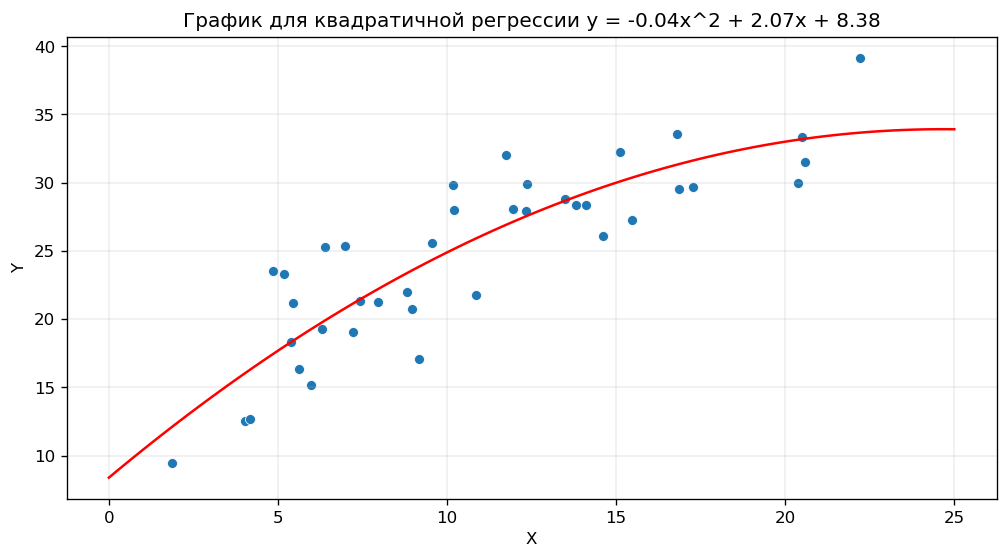

In [120]:
x = np.linspace(0, 25, 100)
y = b1*x** 2 + b2 * x + b3

plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data = df, x = 'X', y = 'Y')
sns.lineplot(x = x, y = y, color='red')
plt.title(f'График для квадратичной регрессии y = {round(b1,2)}x^2 + {round(b2,2)}x + {round(b3,2)}');
plt.grid(linewidth=0.2)


Рассматриваем задачу минимизации:
$$
f(b_1, b_2, b_3, b_4) = \sum_{i=1}^n (b_1 x_i^3 + b_2 x_i^2 + b_3 x_i + b_4 - y_i)^2.
$$

Прирaвняем каждую частную производную к нулю, чтобы найти оптимальные коэффициенты b1, b2, b3, b4\:  

1. Уравнение для b1\:  
$$
\sum_{i=1}^n x_i^6 b_1 + \sum_{i=1}^n x_i^5 b_2 + \sum_{i=1}^n x_i^4 b_3 + \sum_{i=1}^n x_i^3 b_4 = \sum_{i=1}^n x_i^3 y_i.
$$

2. Уравнение для b2\:  
$$
\sum_{i=1}^n x_i^5 b_1 + \sum_{i=1}^n x_i^4 b_2 + \sum_{i=1}^n x_i^3 b_3 + \sum_{i=1}^n x_i^2 b_4 = \sum_{i=1}^n x_i^2 y_i.
$$

3. Уравнение для b3\):  
$$
\sum_{i=1}^n x_i^4 b_1 + \sum_{i=1}^n x_i^3 b_2 + \sum_{i=1}^n x_i^2 b_3 + \sum_{i=1}^n x_i b_4 = \sum_{i=1}^n x_i y_i.
$$

4. Уравнение для b4\:  
$$
\sum_{i=1}^n x_i^3 b_1 + \sum_{i=1}^n x_i^2 b_2 + \sum_{i=1}^n x_i b_3 + \sum_{i=1}^n b_4 = \sum_{i=1}^n y_i.
$$



In [114]:
A = np.array([
    [np.sum(X**6), np.sum(X**5), np.sum(X**4), np.sum(X**3)],
    [np.sum(X**5), np.sum(X**4), np.sum(X**3), np.sum(X**2)],
    [np.sum(X**4), np.sum(X**3), np.sum(X**2), np.sum(X)],
    [np.sum(X**3), np.sum(X**2), np.sum(X), len(X)]
            ])

B = np.array([
    np.sum(X**3 * Y),
    np.sum(X**2 * Y),
    np.sum(X * Y),
    np.sum(Y)
            ])

b1, b2, b3, b4 = np.linalg.solve(A, B)
print(f"Коэффициенты: b1 = {round(b1,2)}, b2 = {round(b2,2)}, b3 = {round(b3,2)}, b4 = {round(b4, 2)}")

Коэффициенты: b1 = 0.01, b2 = -0.23, b3 = 4.1, b4 = 2.42


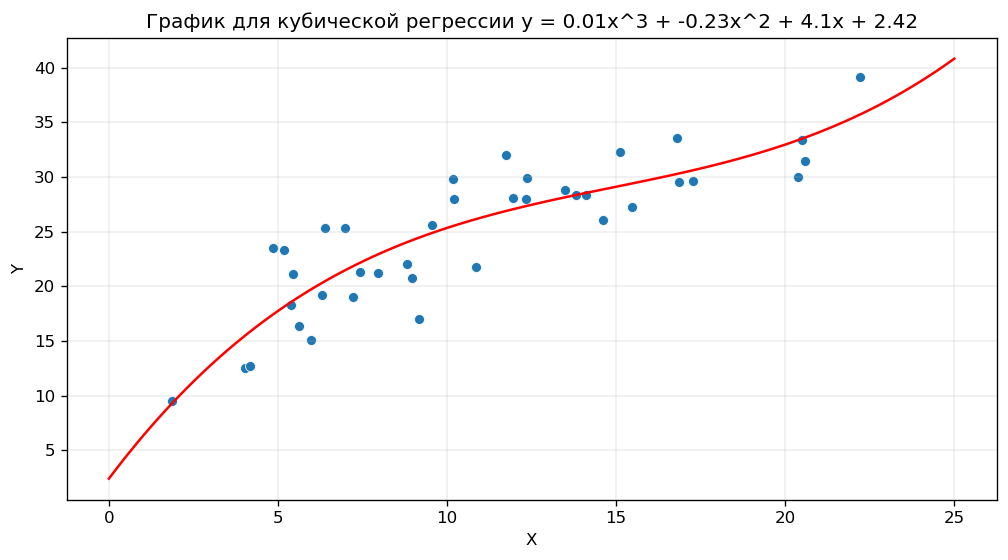

In [116]:
x = np.linspace(0, 25, 100)
y = b1*x** 3 + b2 * x ** 2 + b3 * x + b4

plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data = df, x = 'X', y = 'Y')
sns.lineplot(x = x, y = y, color='red')
plt.title(f'График для кубической регрессии y = {round(b1,2)}x^3 + {round(b2,2)}x^2 + {round(b3,2)}x + {round(b4, 2)}');
plt.grid(linewidth=0.2)



Рассматриваем задачу минимизации:
$$
f(b_1, b_2) = \sum_{i=1}^n (b_1 \ln(x_i) + b_2 - y_i)^2.
$$


Прирaвняем каждую частную производную к нулю, чтобы найти оптимальные коэффициенты b1, b2
1. Производная по b1\:  
$$
\frac{\partial f}{\partial b_1} = 2 \sum_{i=1}^n (b_1 \ln(x_i) + b_2 - y_i) \ln(x_i).
$$

2. Производная по b2\:  
$$
\frac{\partial f}{\partial b_2} = 2 \sum_{i=1}^n (b_1 \ln(x_i) + b_2 - y_i).
$$


Прирaвняем частные производные к нулю:

1. Уравнение для b1\:

$$
\sum_{i=1}^n \ln(x_i)^2 b_1 + \sum_{i=1}^n \ln(x_i) b_2 = \sum_{i=1}^n \ln(x_i) y_i.
$$

2. Уравнение для b2\:

$$
\sum_{i=1}^n \ln(x_i) b_1 + \sum_{i=1}^n b_2 = \sum_{i=1}^n y_i.
$$

In [82]:
ln_X = np.log(X)

A = np.array([[np.sum(ln_X**2), np.sum(ln_X)],
              [np.sum(ln_X), len(X)]])

B = np.array([np.sum(ln_X * Y), np.sum(Y)])

b1, b2 = np.linalg.solve(A, B)
print(f"Коэффициенты: b1 = {round(b1,2)}, b2 = {round(b2,2)}")

Коэффициенты: b1 = 10.49, b2 = 1.12


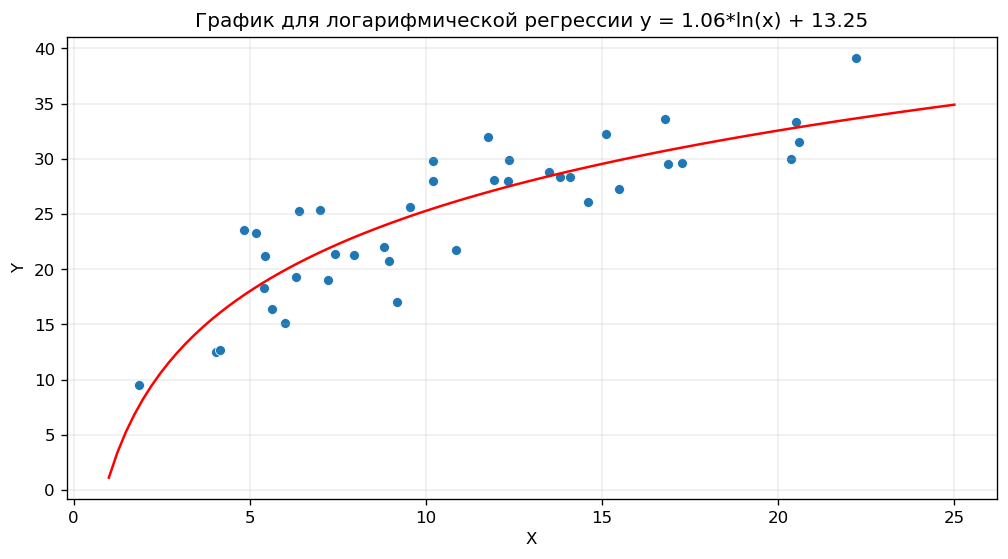

In [110]:
x = np.linspace(1, 25, 100)
y = b1*np.log(x) + b2
plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data = df, x = 'X', y = 'Y')
sns.lineplot(x = x, y = y, color='red')
plt.title(f'График для логарифмической регрессии y = {round(a,2)}*ln(x) + {round(b,2)}');
plt.grid(linewidth=0.2)